In [339]:
#Paquetes necesarios para trabajar
import os
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
#print(os.getcwd())

In [285]:
#Cargamos las información de las imágenes
#Data=np.load('D:/Proyectos_Python/Mineria/1.Datos/images.npy')
Data=np.load('D:/Proyectos_Python/Mineria/1.Datos/Instance 1/Images/images.npy')

In [283]:
#Cargamos el tipo de imágen 
#Types=np.load('D:/Proyectos_Python/Mineria/1.Datos/types.npy')
Types=np.load('D:/Proyectos_Python/Mineria/1.Datos/Instance 1/Images/types.npy')

In [281]:
#Cargamos las máscaras
#Mask=np.load('D:/Proyectos_Python/Mineria/1.Datos/masks.npy')
Mask=np.load('D:/Proyectos_Python/Mineria/1.Datos/Instance 1/Masks/masks.npy')

In [300]:
print("Dimensión de la base de datos: ",Data.ndim)
print("Forma de la base de datos: ",Data.shape)
print("Dimensión de la máscara: ",Mask.ndim)
print("Forma de la máscara: ",Mask.shape)
print("Dimensión del vector de tipo de tejido",Types.ndim)
print("Forma del vector de tipo de tejido",Types.shape)


Dimensión de la base de datos:  4
Forma de la base de datos:  (2656, 256, 256, 3)
Dimensión de la máscara:  4
Forma de la máscara:  (2656, 256, 256, 6)
Dimensión del vector de tipo de tejido 1
Forma del vector de tipo de tejido (2656,)


In [301]:
print("Tipos de tejido ",Types)

Tipos de tejido  ['Breast' 'Breast' 'Breast' ... 'Colon' 'Colon' 'Colon']


In [292]:
prueba1=Data[0,:,:,:]
#print(prueba1)
prueba2=np.array(prueba1, dtype=np.uint8)
#print(prueba2)

Generamos una imágen de prueba


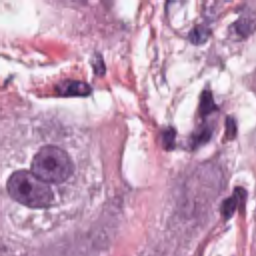

In [302]:
#img1 = im.fromarray(Data[0,:,:,:])
img2 = im.fromarray(prueba2,"RGB")  
#img2.save('img2.png')
print("Generamos una imágen de prueba")
img2

In [311]:
f0=Mask[0,:,:,0]
f2=np.array(f0, dtype=np.uint8)
f2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [313]:
prueba3=prueba2
prueba3[:,:,0]=prueba2[:,:,0]+f2*(-300)
prueba3[:,:,1]=prueba2[:,:,1]+f2*(-300)
prueba3[:,:,2]=prueba2[:,:,2]+f2*(-300)

In [314]:
i=0
new_image =prueba3 
for item in prueba3:
    #print(item)
    j=0
    new_image[i]=item
    
    for a in item:     
    # change all white (also shades of whites)
    # pixels to yellow
        if a[0] <0:
            new_image[i][j]=[255, 224, 100]
        else:
            j=j+1
    i=i+1
 

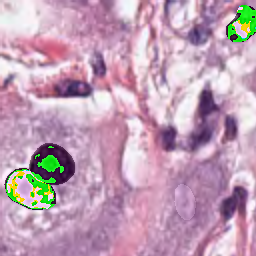

In [315]:
img3 = im.fromarray(new_image,"RGB") 
img3

In [323]:
MeanData=Data.mean(axis=0)
VarData=Data.var(axis=0)

In [324]:
mean_img = im.fromarray(np.array(MeanData, dtype=np.uint8),"RGB")   
var_img = im.fromarray(np.array(VarData, dtype=np.uint8),"RGB")  

Imágen promedio


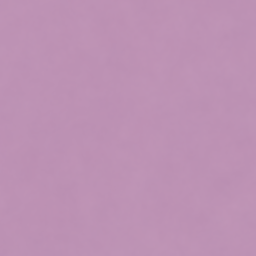

In [328]:
print("Imágen promedio")
mean_img


Varianza de la imágen


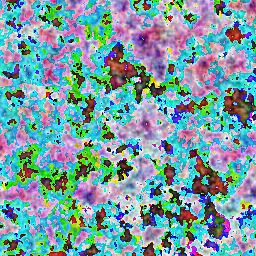

In [329]:
print("Varianza de la imágen")
var_img

In [372]:
#VTipos únicos de tejido
CU=np.unique(Types)
print(CU)
#Creamos arreglos con el índice correspondiente a cada tipo de cáncer
Adrenal_gland = [index for index in range(len(Types))if Types[index] == CU[0]]
Bile_duct = [index for index in range(len(Types))if Types[index] == CU[1]]
Bladder = [index for index in range(len(Types))if Types[index] == CU[2]]
Breast = [index for index in range(len(Types))if Types[index] == CU[3]]
Cervix = [index for index in range(len(Types))if Types[index] == CU[4]]
Colon = [index for index in range(len(Types))if Types[index] == CU[5]]
Esophagus = [index for index in range(len(Types))if Types[index] == CU[6]]
HeadNeck = [index for index in range(len(Types))if Types[index] == CU[7]]
Kidney = [index for index in range(len(Types))if Types[index] == CU[8]]
Liver = [index for index in range(len(Types))if Types[index] == CU[9]]
Lung = [index for index in range(len(Types))if Types[index] == CU[10]]
Ovarian = [index for index in range(len(Types))if Types[index] == CU[11]]
Pancreatic = [index for index in range(len(Types))if Types[index] == CU[12]]
Prostate = [index for index in range(len(Types))if Types[index] == CU[13]]
Skin = [index for index in range(len(Types))if Types[index] == CU[14]]
Stomach = [index for index in range(len(Types))if Types[index] == CU[15]]
Testis = [index for index in range(len(Types))if Types[index] == CU[16]]
Thyroid = [index for index in range(len(Types))if Types[index] == CU[17]]
Uterus = [index for index in range(len(Types))if Types[index] == CU[18]]

#print(indexes)

['Adrenal_gland' 'Bile-duct' 'Bladder' 'Breast' 'Cervix' 'Colon'
 'Esophagus' 'HeadNeck' 'Kidney' 'Liver' 'Lung' 'Ovarian' 'Pancreatic'
 'Prostate' 'Skin' 'Stomach' 'Testis' 'Thyroid' 'Uterus']


In [373]:
#Segmentamos la Base por tipo de tejido
DAdrenal_gland=Data[Adrenal_gland]
DBile_duct=Data[Bile_duct]
DBladder=Data[Bladder]
DBreast=Data[Breast]
DCervix=Data[Cervix]
DColon=Data[Colon]
DEsophagus=Data[Esophagus]
DHeadNeck=Data[HeadNeck]
DKidney=Data[Kidney]
DLiver=Data[Liver]
DLung=Data[Lung]
DOvarian=Data[Ovarian]
DPancreatic=Data[Pancreatic]
DProstate=Data[Prostate]
DSkin=Data[Skin]
DStomach=Data[Stomach]
DTestis=Data[Testis]
DThyroid=Data[Thyroid]
DUterus=Data[Uterus]

In [374]:
listdata=[
    DAdrenal_gland,
DBile_duct,
DBladder,
DBreast,
DCervix,
DColon,
DEsophagus,
DHeadNeck,
DKidney,
DLiver,
DLung,
DOvarian,
DPancreatic,
DProstate,
DSkin,
DStomach,
DTestis,
DThyroid,
DUterus
]

i=0
for data in listdata:
    print("Base: ",CU[i]," ",data.shape)
    i=i+1

Base:  Adrenal_gland   (134, 256, 256, 3)
Base:  Bile-duct   (159, 256, 256, 3)
Base:  Bladder   (21, 256, 256, 3)
Base:  Breast   (827, 256, 256, 3)
Base:  Cervix   (155, 256, 256, 3)
Base:  Colon   (478, 256, 256, 3)
Base:  Esophagus   (155, 256, 256, 3)
Base:  HeadNeck   (70, 256, 256, 3)
Base:  Kidney   (37, 256, 256, 3)
Base:  Liver   (65, 256, 256, 3)
Base:  Lung   (80, 256, 256, 3)
Base:  Ovarian   (54, 256, 256, 3)
Base:  Pancreatic   (78, 256, 256, 3)
Base:  Prostate   (77, 256, 256, 3)
Base:  Skin   (59, 256, 256, 3)
Base:  Stomach   (50, 256, 256, 3)
Base:  Testis   (60, 256, 256, 3)
Base:  Thyroid   (80, 256, 256, 3)
Base:  Uterus   (17, 256, 256, 3)


Número de casos por tipo de Órgano


<module 'matplotlib.pyplot' from 'D:\\programas\\Anaconda\\envs\\MCD\\lib\\site-packages\\matplotlib\\pyplot.py'>

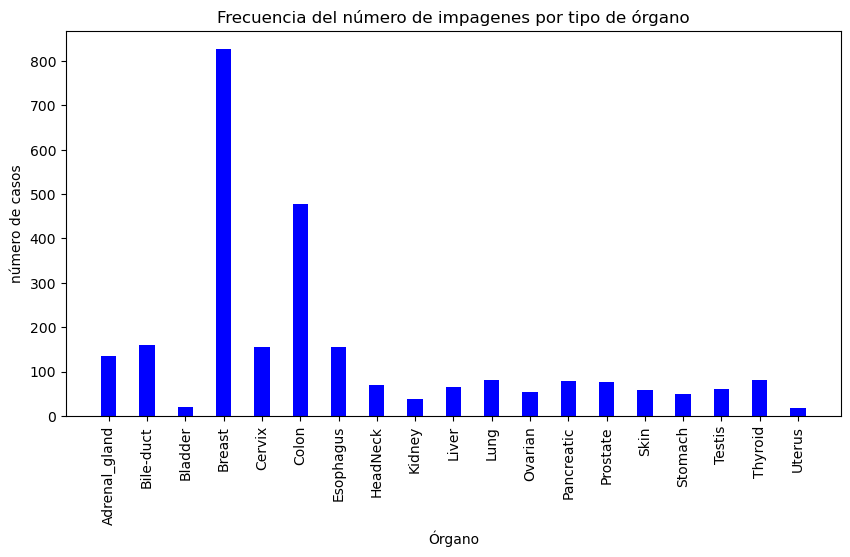

In [375]:
print("Número de casos por tipo de Órgano")
conteos={}

i=0
for data in listdata:
    conteos[CU[i]]=data.shape[0]
    i=i+1    
conteos    

Organo = conteos.keys()
casos = conteos.values()
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Organo, casos, color ='blue',
        width = 0.4)
 
plt.xticks(rotation = 90)    
plt.xlabel("Órgano")
plt.ylabel("número de casos")
plt.title("Frecuencia del número de impagenes por tipo de órgano")
plt.savefig("Hist_casos.png")
plt

In [376]:
#Imágenes promedio
imglist=[]
for data in listdata:
    imglist.append(im.fromarray(np.array(data.mean(axis=0), dtype=np.uint8),"RGB"))

In [377]:
#varianza de imágenes
varimglist=[]
for data in listdata:
    varimglist.append(im.fromarray(np.array(data.var(axis=0), dtype=np.uint8),"RGB"))

In [378]:
i=0
for img in imglist:
    img.save(CU[i]+'.png')
    i=i+1

i=0
for img in varimglist:
    img.save(CU[i]+'var.png')
    i=i+1


In [386]:
#Trabajemos con la Base Breast
#Base con información de Breast
#DBreast

#Índices de Cervix
#print(Breast) 
#print(Types[Breast])


#BP1Trans=np.reshape(BP1,(256,-1))
#BP1Trans
#BP1.reshape(-1,BP1.shape[-1])

In [392]:
#Obtenemos la máscara para Breast
DBreast.shape
Mask[Breast].shape
MBreast=Mask[Breast]
MBreast.shape

(827, 256, 256, 6)

In [393]:
Bprueba=MBreast[0,:,:,:]

In [423]:
bp0=Bprueba[:,:,0]
bp1=Bprueba[:,:,1]
bp2=Bprueba[:,:,2]
bp3=Bprueba[:,:,3]
bp4=Bprueba[:,:,4]
bp5=Bprueba[:,:,5]

In [447]:
#bp0.sum(axis=1)
#i=145
#print(bp0[i,:])
#print(bp1[i,:])
#print(bp2[i,:])
#print(bp3[i,:])
#print(bp4[i,:])
#print(bp5[i,:])

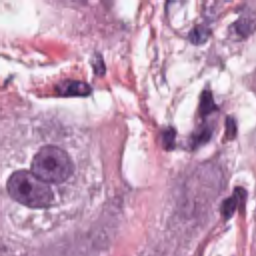

In [442]:
imgp0=im.fromarray(np.array(DBreast[0,:,:,:], dtype=np.uint8),"RGB") 
imgp0

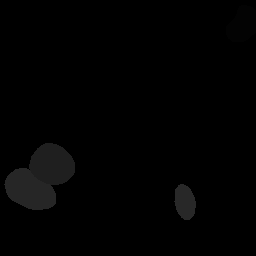

In [446]:
im.fromarray(np.array(bp0, dtype=np.uint8)) 

In [449]:
#bp0.to_excel('mask0.xlsx', engine='openpyxl', index=False)
import pandas as pd
pd.DataFrame(bp0).to_excel('mask0.xlsx', engine='openpyxl', index=False)

In [467]:
np.count_nonzero(bp0 > 0)/(bp0.shape[0]*bp0.shape[1])

0.066741943359375

In [480]:
props=[]
#MBreast.shape[0]
for i in range(MBreast.shape[0]):
     #print(i)
    aux=[] 
    for j in range(MBreast.shape[3]):
        #print(j)
        aux.append(np.count_nonzero(MBreast[i,:,:,j] > 0)/(MBreast[i,:,:,j].shape[0]*MBreast[i,:,:,j].shape[1]))
    props.append(aux)    


0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1


1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2


[0.17303466796875,
 0.002471923828125,
 0.0433349609375,
 0.0,
 0.0,
 0.781158447265625]

In [485]:
props
df_props=pd.DataFrame(props, columns=['canal0', 'canal1','canal2','canal3','canal4','canal5'])
print(df_props)

       canal0    canal1    canal2  canal3  canal4    canal5
0    0.066742  0.011978  0.017960     0.0     0.0  0.903320
1    0.121658  0.006424  0.004990     0.0     0.0  0.866928
2    0.181335  0.000000  0.023315     0.0     0.0  0.795349
3    0.195221  0.000000  0.000000     0.0     0.0  0.804779
4    0.072678  0.012100  0.009064     0.0     0.0  0.906158
..        ...       ...       ...     ...     ...       ...
822  0.392670  0.000000  0.005005     0.0     0.0  0.602325
823  0.151413  0.000000  0.015900     0.0     0.0  0.832687
824  0.275375  0.000000  0.043777     0.0     0.0  0.681015
825  0.073364  0.000000  0.079086     0.0     0.0  0.847580
826  0.173035  0.002472  0.043335     0.0     0.0  0.781158

[827 rows x 6 columns]


(array([299.,   9.,   5.,  13.,  11.,  10.,  11.,   5.,   6.,   9.,  10.,
          8.,   9.,  11.,  10.,   4.,   9.,   4.,   8.,  10.,   9.,  11.,
         14.,  11.,   8.,   7.,  16.,   8.,   7.,   6.,   9.,   9.,   6.,
          4.,   7.,   9.,   6.,   8.,  11.,   6.,   9.,   6.,  14.,   4.,
          3.,   3.,  10.,   5.,   6.,   7.,   7.,   4.,   4.,   5.,   8.,
          8.,   5.,   3.,   8.,   6.,   4.,   2.,   2.,   1.,   5.,   3.,
          4.,   0.,   4.,   5.,   1.,   2.,   0.,   4.,   2.,   2.,   4.,
          3.,   3.,   3.,   2.,   2.,   1.,   0.,   3.,   0.,   0.,   1.,
          1.,   2.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.00450485, 0.0090097 , 0.01351456, 0.01801941,
        0.02252426, 0.02702911, 0.03153397, 0.03603882, 0.04054367,
        0.04504852, 0.04955338, 0.05405823, 0.05856308, 0.06306793,
        0.06757278, 0.07207764, 0.07658249, 0.08108734, 0.08559219,
        0.09009705, 0.0946019 , 0.09910675, 0.

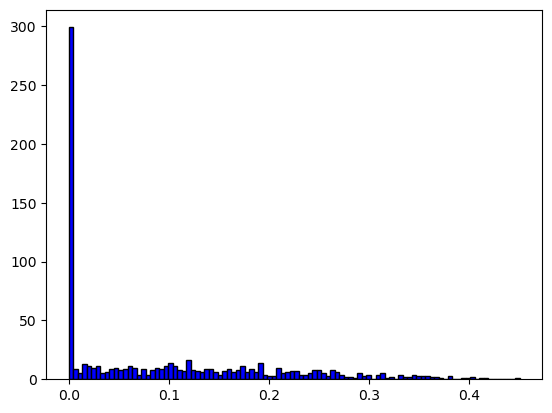

In [494]:

plt.hist(df_props['canal0'], color = 'blue', edgecolor = 'black',bins = 100)

{'whiskers': [<matplotlib.lines.Line2D at 0x20ce35aedc8>,
 'caps': [<matplotlib.lines.Line2D at 0x20ce35ae388>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ce35bb648>],
 'medians': [<matplotlib.lines.Line2D at 0x20ce35a17c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ce35a1048>],
 'means': []}

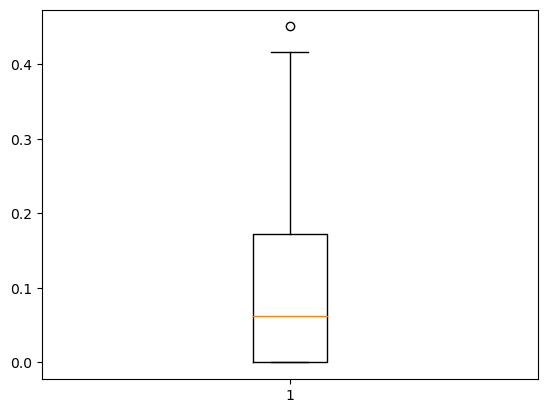

In [493]:
plt.boxplot(df_props['canal0'])

In [497]:
df_props['canal0'][df_props['canal0']==0]

31     0.0
38     0.0
41     0.0
45     0.0
46     0.0
      ... 
800    0.0
801    0.0
802    0.0
803    0.0
804    0.0
Name: canal0, Length: 285, dtype: float64